**Step 1 - Data Understanding**
- shape
- columns
- head & tail
- info
- dtypes
- describe
    
**Step 2 - Data Preparation**
- Droping irrelative Columns and Rows
- Identifying duplicated columns
- Renaming columns
- Feature creation
    
**Step 3 - Feature Understanding** (univariate analysis)
- Plotting features distributions
    - Histogram
    - KDE
    - Box plot
    
**Step 4 - Feature Relationship**
- Scatter plot
- Heatmap correlation
- Pair plot
- Groupby comparisons

## Functions

In [1]:
def overview_categorical_feature_full(data, feature, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=100)

    sns.countplot(data=data, y=feature, ax=axes.flatten()[0])
    axes.flatten()[0].set_title('Without Missing Values')
    axes.flatten()[0].set_yticklabels(axes.flatten()[0].get_yticklabels(), rotation=45)
    axes.flatten()[0].set_ylabel('')
    axes.flatten()[0].set_xlabel('')
    sns.countplot(data=data.fillna('MISSING'), y=feature, ax=axes.flatten()[1])
    axes.flatten()[1].set_title('With Missing Values')
    axes.flatten()[1].set_yticklabels(axes.flatten()[1].get_yticklabels(), rotation=-45)
    axes.flatten()[1].invert_xaxis()
    axes.flatten()[1].yaxis.set_ticks_position('right')
    axes.flatten()[1].set_ylabel('')
    axes.flatten()[1].set_xlabel('')
    
    
    
    df_counts = data.sort_values(by=feature)[feature].value_counts()
    count = list(df_counts.values)
    index = list(df_counts.index)
    colors = sns.color_palette('muted')[0:len(index)]
    
    axes.flatten()[2].pie(count, labels=index, autopct='%.0f%%', startangle=90, colors=colors)
    axes.flatten()[2].text(0.5, -0.15, 'Percentages of all values', ha='center', va='bottom', 
                           transform=axes.flatten()[2].transAxes)

    df_counts_target = data[data[target]==1].sort_values(by=feature)[feature].value_counts()
    count_target = list(df_counts_target.values)
    index_target = list(df_counts_target.index)
    
    axes.flatten()[3].pie(count_target, labels=index_target, autopct='%.0f%%', startangle=90, colors=colors)
    axes.flatten()[3].text(0.5, -0.15, 'Percentages of targetted values', ha='center', va='bottom', 
                           transform=axes.flatten()[3].transAxes)

    fig.suptitle('Seaborn Plots in Subplots')

    plt.show()

In [2]:
def overview_numerical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 6), dpi=100)
    i=0
    for feature in features:
        sns.kdeplot(data=df, x=feature, hue=target, multiple='stack', palette='colorblind', ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        i += 1


    plt.show()

In [3]:
def remove_outliers_z_score(data, feature, threshold):
    z_scores = (data[feature] - np.mean(data[feature])) / np.std(data[feature])

    threshold = threshold

    outliers_indices = np.where(np.abs(z_scores) > threshold)[0]

    clean_df = data.drop(outliers_indices, axis=0)
    
    clean_df.reset_index(drop=True, inplace=True)
    
    return clean_df

In [4]:
def overview_categorical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 12), dpi=100)
    i=0
    for feature in features:
        sns.countplot(data=data, y=feature, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        rotation = 45
        if i%2 == 1:
            axes.flatten()[i].invert_xaxis()
            axes.flatten()[i].yaxis.set_ticks_position('right')
            rotation = -45
        axes.flatten()[i].set_yticklabels(axes.flatten()[i].get_yticklabels(), rotation=rotation)
        axes.flatten()[i].set_ylabel('')
        axes.flatten()[i].set_xlabel('')
        i += 1


    plt.show()

### Import required libraries

In [5]:
import pandas as pd
import numpy as np


# Visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style


### Import Dataset

In [6]:
df = pd.read_excel('Data_Pathrise.xlsx')

## Step 1 - Data understanding

### shape

In [7]:
df.shape

(2544, 16)

### columns

In [8]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

### info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

### head & tail

In [10]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [11]:
df.tail()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify
2543,2544,Withdrawn,SWE,OCT19A,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


### dtypes

In [12]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

### describe

In [13]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


## Step 2 - Data Preparation

### Column names Correction

In [14]:
# some features has blank spaces in their names so we should remove spaces from the features name
df.columns = df.columns.str.strip()

### Droping irrelative Columns and Rows

#### id

In [15]:
df.drop('id', axis=1, inplace=True)

#### pathrise_status

In [16]:
df['pathrise_status'].unique()

array(['Active', 'Closed Lost', 'Placed', 'Withdrawn (Failed)',
       'Withdrawn (Trial)', 'Withdrawn', 'Deferred', 'Break', 'MIA'],
      dtype=object)

Try to Find and Prove relation between *pathrise Status* **categories** and *Program Duration Days* **missing** values

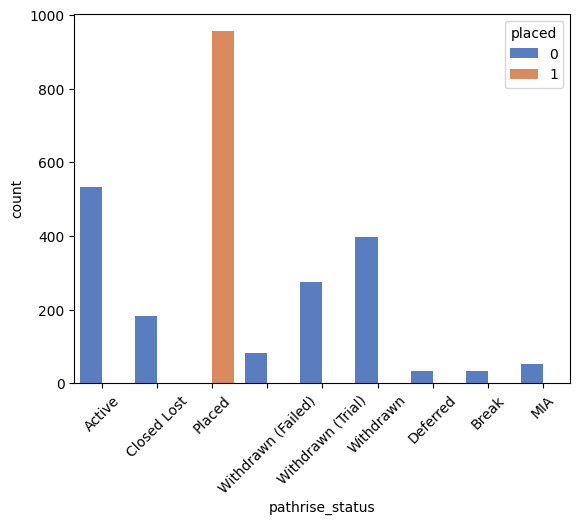

In [17]:
sns.countplot(data=df, x='pathrise_status', hue='placed', palette='muted')
plt.xticks(rotation=45)
plt.show()

The plot shows that there is a direct relation between pathrise_status and target feature. But I believe that we don't have access to such information at the joining moment, so I will remove it from the Dataset also. In the other hand, the **Active** and **Break** fellows which do not finished their program but are still in the program, may brings some bias to the Dataset and effect the result with an invalid target values which is not decisive yet. so maybe I will have removed the rows with these status before remove this feature completely.

In [18]:
df[(df['pathrise_status']=='Active') | (df['pathrise_status']=='Break')]['program_duration_days'].unique()

array([nan])

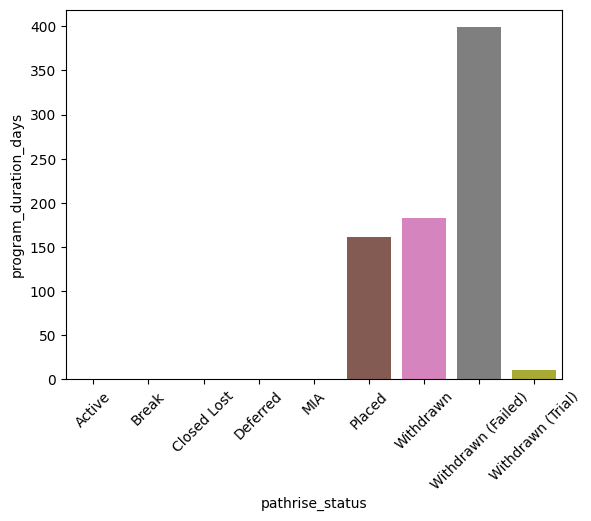

In [19]:
grouped_data=df.groupby("pathrise_status")["program_duration_days"].mean().reset_index()
sns.barplot(x="pathrise_status", y="program_duration_days", data=grouped_data)
plt.xticks(rotation=45)
plt.show()

In [20]:
df[(df['pathrise_status']=='Active') | (df['pathrise_status']=='Break')]['placed'].unique()

array([0], dtype=int64)

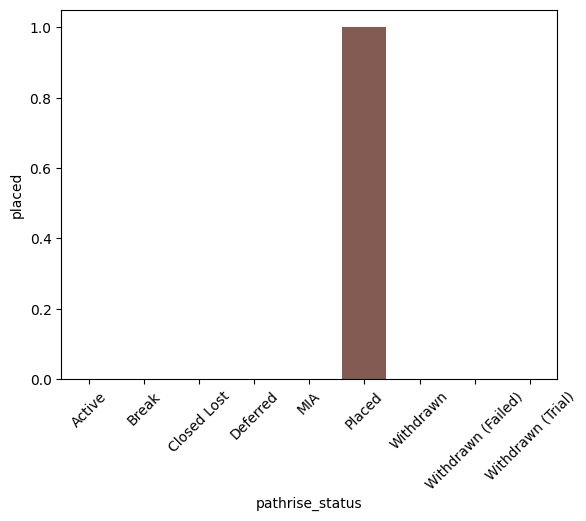

In [21]:
grouped_data=df.groupby("pathrise_status")["placed"].mean().reset_index()
sns.barplot(x="pathrise_status", y="placed", data=grouped_data)
plt.xticks(rotation=45)
plt.show()

### Identifying duplicated columns

### Renaming columns

### Feature creation

#### cohort_tag

In [22]:
df['cohort_tag'].unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A', nan],
      dtype=object)

In [23]:
# extract month from cohort_tag
df['cohort_tag_month'] = df['cohort_tag'].str[:3]

In [24]:
df['cohort_tag_month'].unique()

array(['OCT', 'JAN', 'AUG', 'SEP', 'DEC', 'FEB', 'NOV', 'JUL', 'APR',
       'MAR', 'JUN', 'MAY', nan], dtype=object)

In [25]:
# extract fortnight symbol from cohort_tag
df['cohort_tag_fortnight'] = df['cohort_tag'].str[-1:]

In [26]:
df['cohort_tag_fortnight'].unique()

array(['A', 'B', 'C', 'a', nan], dtype=object)

In [27]:
df['cohort_tag_fortnight'] = df['cohort_tag_fortnight'].str.upper()

In [28]:
df['cohort_tag_fortnight'].unique()

array(['A', 'B', 'C', nan], dtype=object)

## Step 3 - Feature Understanding (univariate analysis)

### Plotting features distributions

#### Histogram

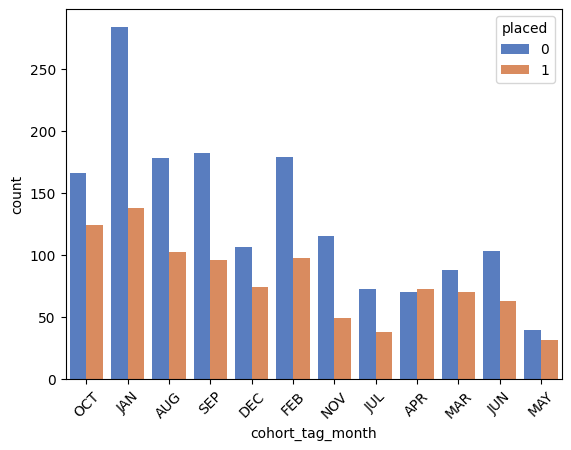

In [29]:
sns.countplot(data=df, x='cohort_tag_month', hue='placed', palette='muted')
plt.xticks(rotation=45)
plt.show()

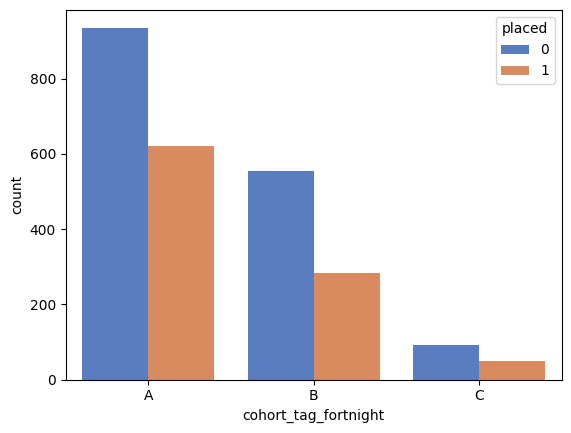

In [30]:
sns.countplot(data=df, x='cohort_tag_fortnight', hue='placed', palette='muted')
plt.show()

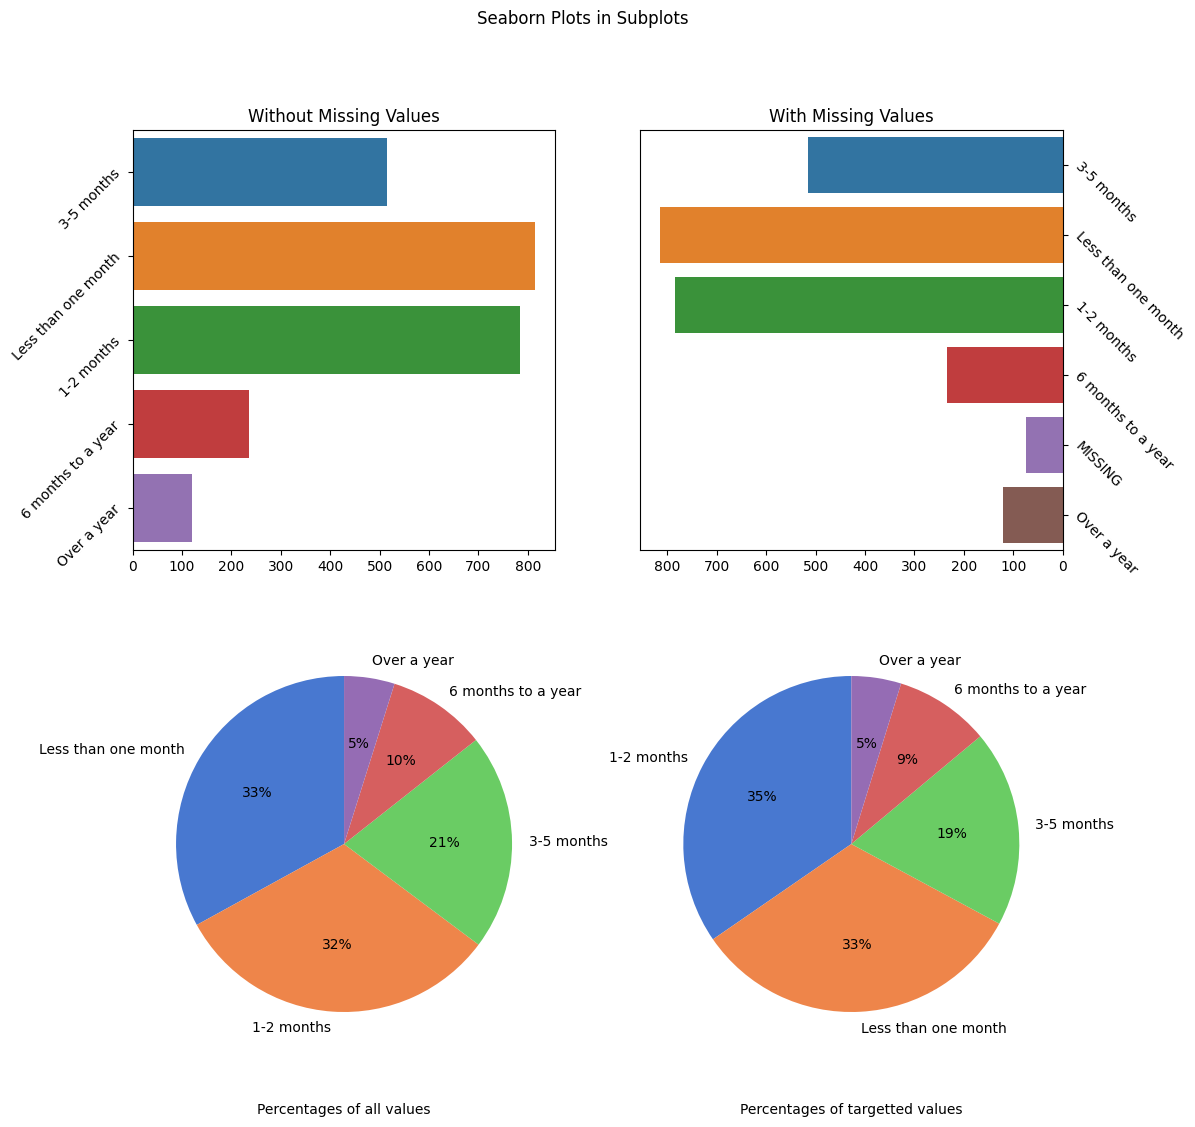

In [31]:
overview_categorical_feature_full(data=df, feature='length_of_job_search', target='placed')

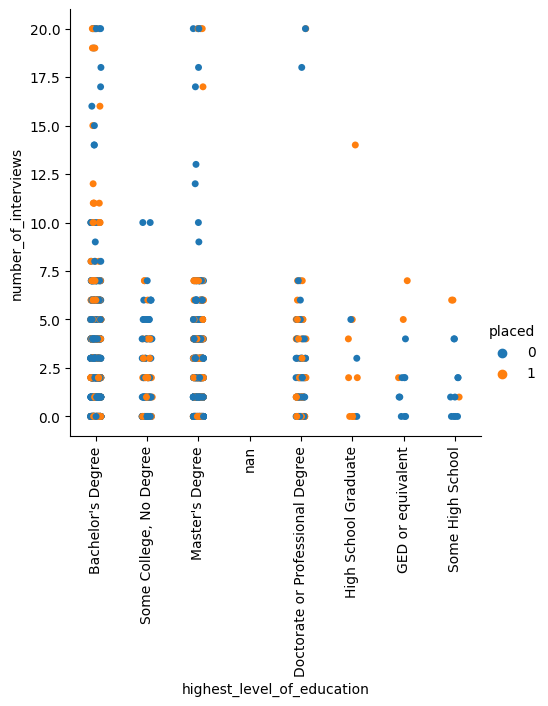

In [32]:
sns.catplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

In [33]:
categorical_features=['primary_track',
        'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']

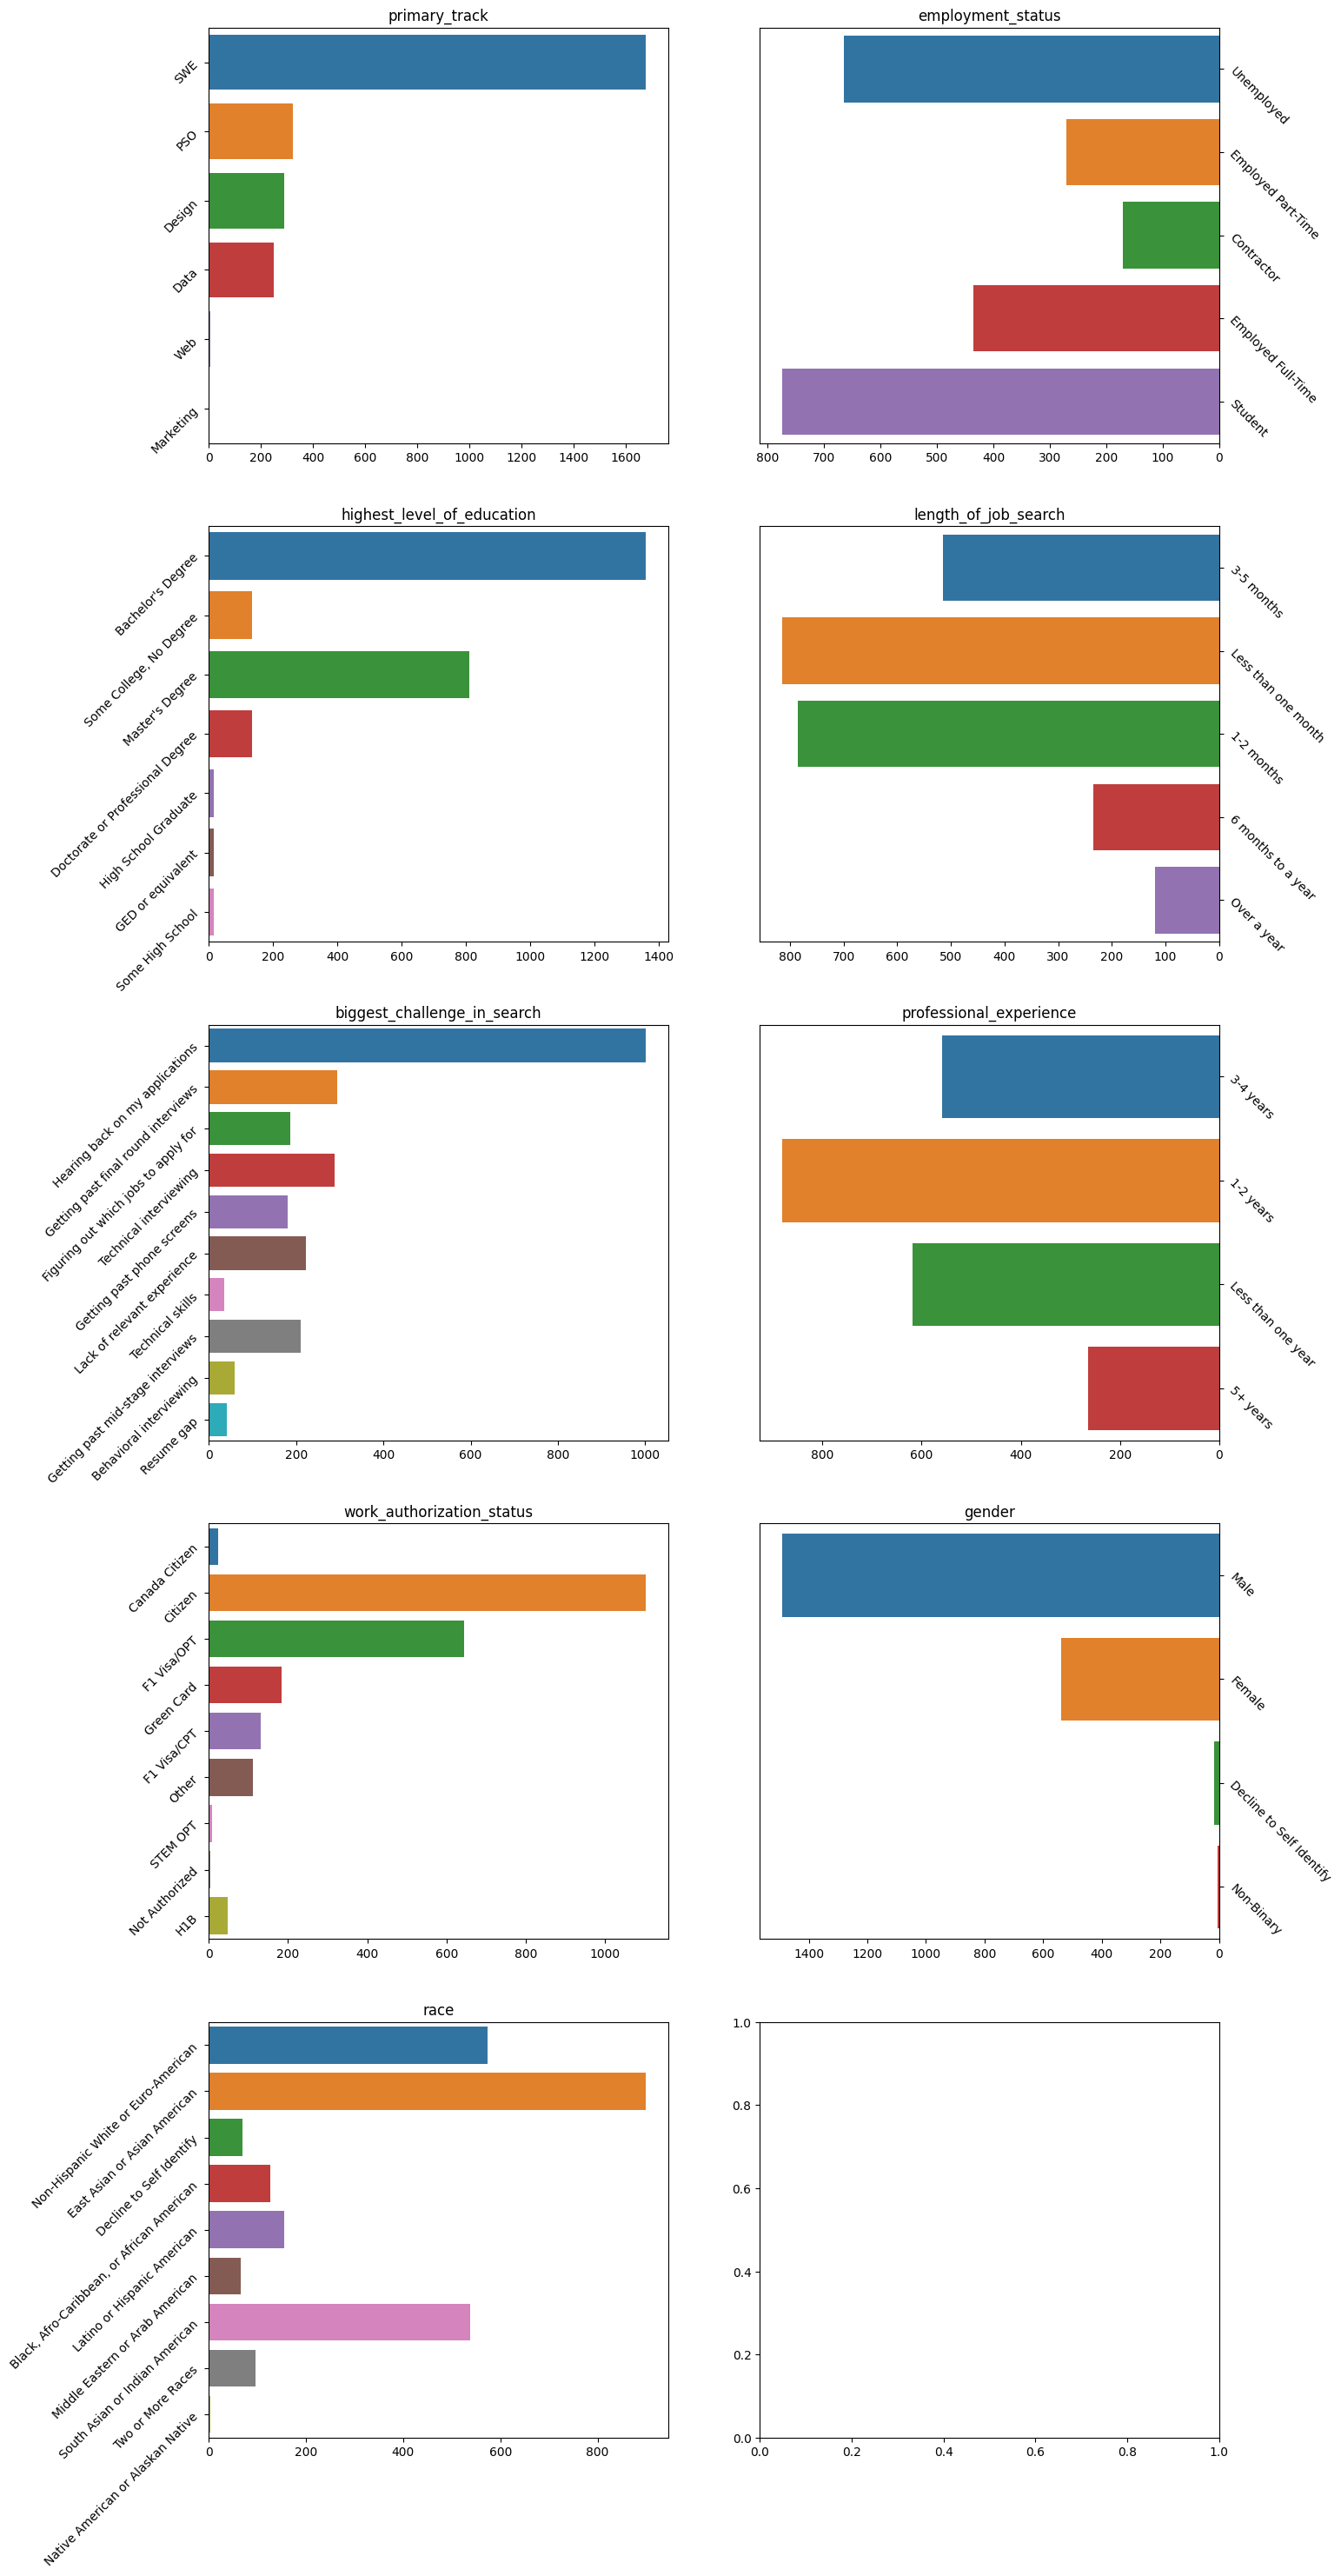

In [34]:
overview_categorical_features(data=df, features=categorical_features, target='placed')

#### KDE

<Axes: xlabel='number_of_interviews', ylabel='Density'>

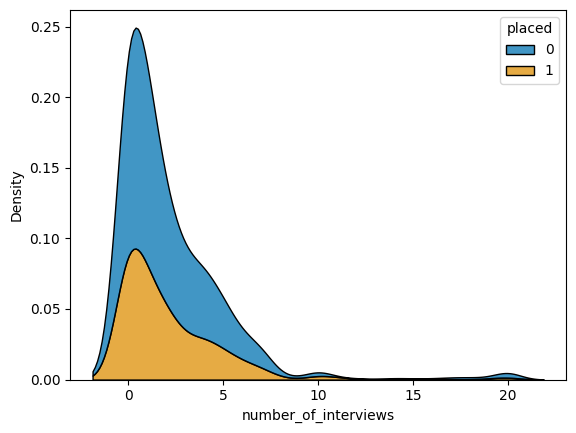

In [35]:
sns.kdeplot(data=df, x='number_of_interviews', hue='placed', multiple='stack', palette='colorblind')

In [36]:
numerical_features=['number_of_interviews',
       'number_of_applications']

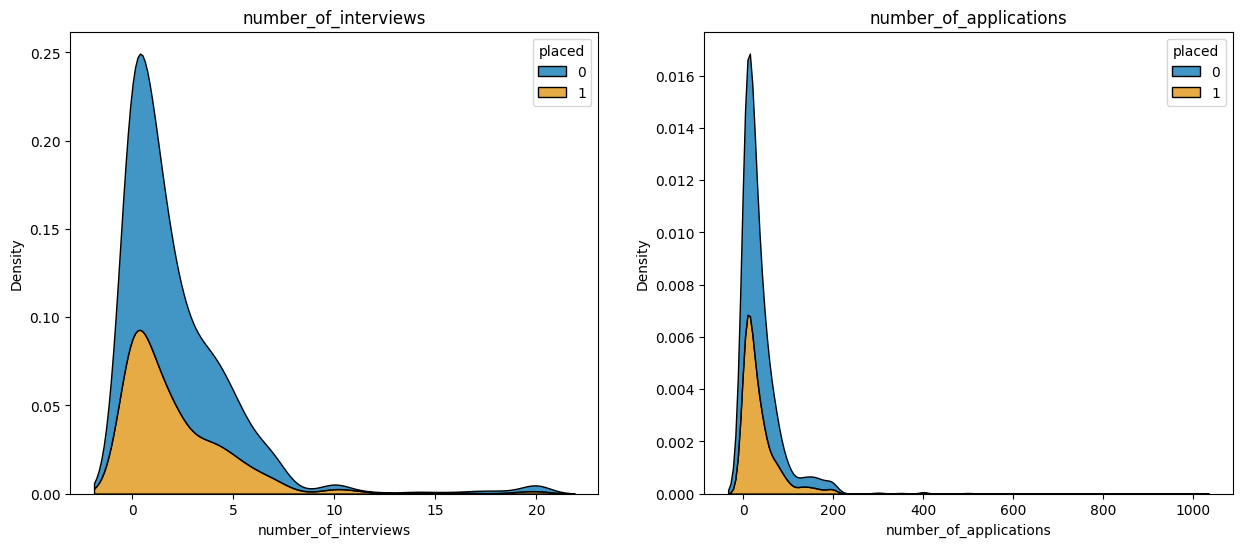

In [37]:
overview_numerical_features(data=df, features=numerical_features, target='placed')

#### Box plot

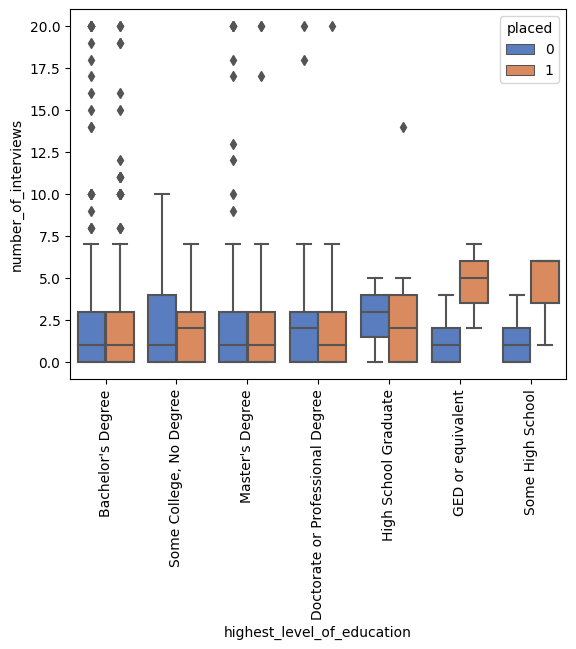

In [38]:
sns.boxplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed', palette='muted')
plt.xticks(rotation=90)
plt.show()

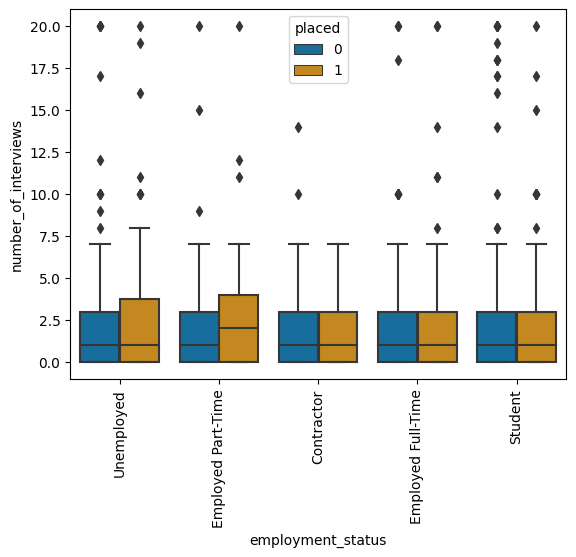

In [39]:
sns.boxplot(data=df, x='employment_status', y='number_of_interviews', hue='placed', palette='colorblind')
plt.xticks(rotation=90)
plt.show()

### Dealing with outliers

In [40]:
df=remove_outliers_z_score(data=df, feature='number_of_applications', threshold=3)

In [41]:
df=remove_outliers_z_score(data=df, feature='number_of_interviews', threshold=3)

## Step 4 - Feature Relationship

### Scatter plot

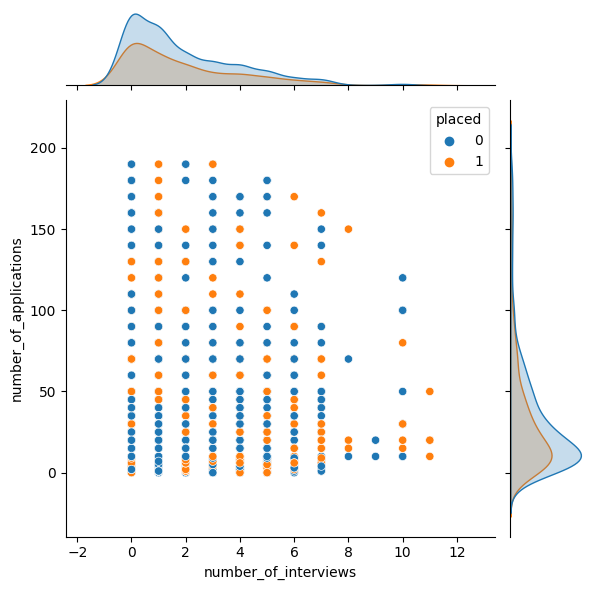

In [42]:
sns.jointplot(data=df, x='number_of_interviews', y='number_of_applications', hue='placed')
plt.show()

### Heatmap correlation

### Pair plot

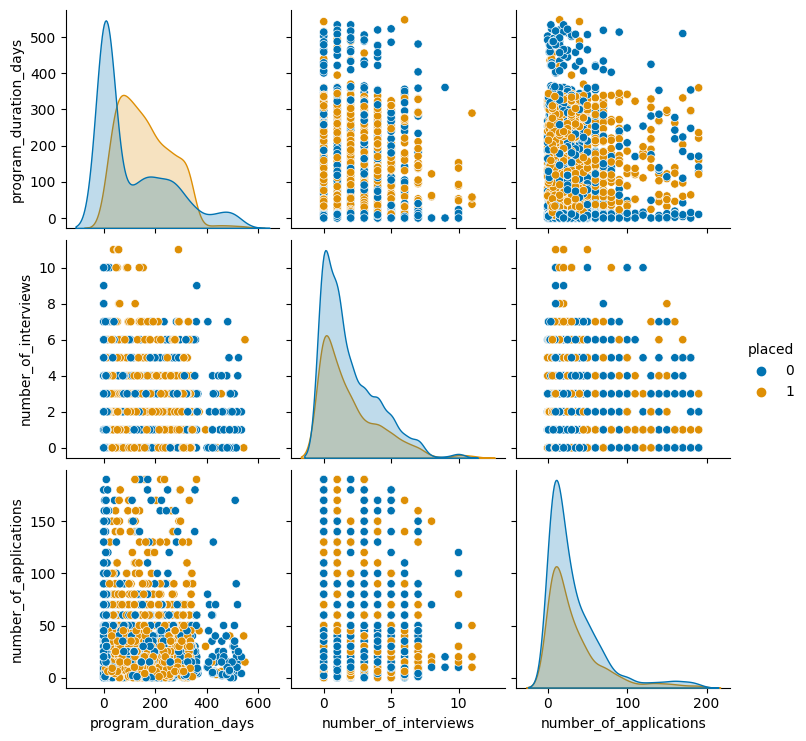

In [43]:
sns.pairplot(data=df, hue='placed', palette='colorblind')
plt.show()

### Groupby comparisons

In [44]:
df.to_csv('Pathrise_prepared.csv', index=False)